In [99]:
import csv
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from __future__ import division
%matplotlib inline

In [100]:
data = pd.read_csv('DelayedFlights.csv')

In [101]:
data_train, X_test = train_test_split(data, test_size=0.9998,random_state=42)
print data_train.shape
data_train.drop({'Year','DayofMonth','FlightNum','TailNum','TaxiIn','TaxiOut'},1, inplace = True)

(387, 30)


In [102]:
data_train.drop(data_train.columns[0], axis = 1,inplace = True)

In [103]:
data_train.drop({'DepTime','ArrTime','ActualElapsedTime','CRSElapsedTime','Diverted'}, axis = 1,inplace = True)
data_train = data_train.reset_index()
print data_train.columns.values
print data_train.head()


['index' 'Month' 'DayOfWeek' 'CRSDepTime' 'CRSArrTime' 'UniqueCarrier'
 'AirTime' 'ArrDelay' 'DepDelay' 'Origin' 'Dest' 'Distance' 'Cancelled'
 'CancellationCode' 'CarrierDelay' 'WeatherDelay' 'NASDelay'
 'SecurityDelay' 'LateAircraftDelay']
     index  Month  DayOfWeek  CRSDepTime  CRSArrTime UniqueCarrier  AirTime  \
0   986001      6          2         950        1543            DL    194.0   
1   767836      5          2        1545        1955            XE    137.0   
2   133272      1          3         708        1140            NW    180.0   
3  1785954     12          2        1215        1434            YV     51.0   
4   824792      5          4         545         640            MQ     32.0   

   ArrDelay  DepDelay Origin Dest  Distance  Cancelled CancellationCode  \
0      -9.0       6.0    SLC  ATL      1589          0                N   
1     -22.0       7.0    OMA  EWR      1133          0                N   
2       9.0       7.0    MSP  MIA      1501          0    

In [104]:
k = 3
#data_k_means = pd.DataFrame(data_train.iloc[:,[2,3,9]])
data_k_means = pd.DataFrame(data_train.iloc[:,[2,3,6]])
data_k_means = data_k_means.dropna()
data_k_means_target = pd.DataFrame(data_train.iloc[:,8])
data_k_means_target = data_k_means_target.dropna()
data_k_means['CRSDepTime'] = data_k_means['CRSDepTime'] // 100.
data_k_means['CRSDepTime'] = (data_k_means['CRSDepTime'] % 24.).astype(int)
print data_k_means.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 386
Data columns (total 3 columns):
DayOfWeek     386 non-null int64
CRSDepTime    386 non-null int64
AirTime       386 non-null float64
dtypes: float64(1), int64(2)
memory usage: 12.1 KB
None


In [105]:
#labelEncoder = LabelEncoder()
#labelEncoder.fit(data_k_means['Origin'])
#data_k_means['Origin'] = labelEncoder.transform(data_k_means['Origin'])
print data_k_means.head()

   DayOfWeek  CRSDepTime  AirTime
0          2           9    194.0
1          2          15    137.0
2          3           7    180.0
3          2          12     51.0
4          4           5     32.0


In [106]:
print data_k_means.head()
print data_k_means_target.head()

   DayOfWeek  CRSDepTime  AirTime
0          2           9    194.0
1          2          15    137.0
2          3           7    180.0
3          2          12     51.0
4          4           5     32.0
   DepDelay
0       6.0
1       7.0
2       7.0
3      30.0
4      38.0


In [107]:
data_k_means_target = pd.DataFrame(data_train.iloc[:,8])
interval = float((data_k_means_target.max() - data_k_means_target.min())/k)
print interval
data_k_means_target['DepDelay'] = data_k_means_target['DepDelay'] // interval
data_k_means_target['DepDelay'] = data_k_means_target['DepDelay'].astype(int)
print data_k_means

112.333333333
     DayOfWeek  CRSDepTime  AirTime
0            2           9    194.0
1            2          15    137.0
2            3           7    180.0
3            2          12     51.0
4            4           5     32.0
5            7          21    146.0
6            3          21     53.0
7            5          17     51.0
8            5          15     48.0
9            7          15     72.0
10           1           9     79.0
11           5          16     78.0
12           2          10     53.0
13           5           8    199.0
14           5          15     31.0
15           3          11    203.0
16           7          15     70.0
17           5          12    151.0
18           6          16     37.0
19           6           6    188.0
20           6           8    271.0
21           7          17     79.0
22           6          19     46.0
23           6          16     98.0
24           5          15    156.0
25           7          18    152.0
26           5

In [108]:
X = np.array(data_k_means).astype(float)
y = np.array(data_k_means_target)


In [109]:
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
kmeans = KMeans(n_clusters = k, n_init = 10, max_iter=600) 
kmeans.fit(X)
print kmeans.predict(X)

[1 2 1 0 0 2 0 0 0 0 0 0 0 1 0 1 0 2 0 1 1 0 0 2 2 2 1 2 0 0 2 0 0 2 2 1 2
 0 2 2 0 0 2 0 0 2 2 1 0 2 2 0 0 2 2 2 1 0 0 0 2 2 0 1 0 0 2 1 0 0 0 2 1 0
 2 1 1 0 0 1 2 0 0 0 2 0 0 0 1 0 1 2 0 0 1 2 0 0 0 2 1 0 2 0 0 2 2 2 2 2 1
 2 0 0 2 2 2 0 2 0 0 2 0 0 0 0 2 1 2 2 0 2 0 0 0 2 0 1 0 0 0 0 2 2 1 0 0 1
 2 0 0 1 0 0 0 1 1 2 0 2 0 0 0 1 2 2 0 0 0 1 2 2 0 2 0 1 0 0 0 0 0 1 2 0 2
 0 0 0 0 1 0 0 2 0 2 0 2 2 0 2 0 2 0 2 2 2 0 2 0 2 0 0 0 0 2 0 0 1 2 2 0 0
 0 0 1 1 0 2 0 2 2 2 0 2 2 2 2 0 0 2 0 1 0 0 0 0 0 2 0 0 2 0 2 2 1 0 0 1 0
 0 1 0 1 0 2 0 2 2 0 0 2 2 0 0 1 0 0 0 0 2 1 0 1 2 0 0 2 2 0 1 1 0 2 2 0 0
 1 2 0 1 0 2 2 2 2 0 1 0 2 0 0 2 0 0 2 2 0 2 0 2 0 0 2 0 2 0 0 2 0 1 0 0 2
 2 2 0 2 2 0 2 2 2 0 2 0 0 0 2 0 0 0 0 2 0 2 0 1 0 0 2 0 1 0 0 0 1 2 0 0 0
 1 2 0 2 2 0 0 0 1 0 0 2 0 1 0 0]


0.497409326425


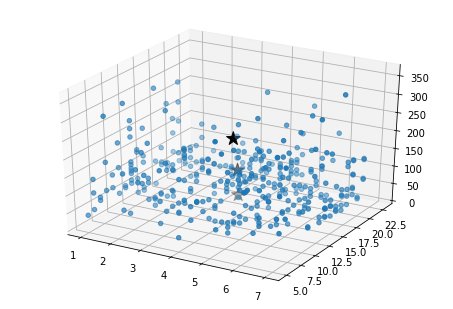

In [110]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
print(correct/len(X))
C = kmeans.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=200)

In [161]:
k = 9
data_k_means_target = pd.DataFrame(data_train.iloc[:,8])
interval = float((data_k_means_target.max() - data_k_means_target.min())/k)
data_k_means_target['DepDelay'] = data_k_means_target['DepDelay'] // interval
data_k_means_target['DepDelay'] = data_k_means_target['DepDelay'].astype(int)
y = np.array(data_k_means_target)


0.145077720207


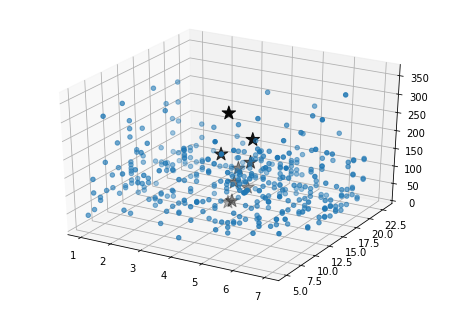

In [165]:
kmeans = KMeans(n_clusters = k, n_init = 10, max_iter=600) 
kmeans.fit(X)
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
print(correct/len(X))

C = kmeans.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=200)